# CHAPTER 08. 텍스트 분석
## 05. 감성분석
### 감성분석 소개
: 문서의 주관적인 감성/의견/기분 등을 파악하기 위한 방법으로 소셜 미디어, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용되고 있다.
- 문서 내 텍스트가 나타내는 여러가지 주관적인 단어와 문맥을 기반으로 감성 수치 계산하는 방법을 이용한다.
- 감성 지수는 긍정 감성지수와 부정 감성 지수로 구성되며 이들 지수를 합산해 긍정 감성 또는 부정 감성을 결합한다.
- 감성분석은 머신러닝 관점에서 지도학습과 비지도학습 방식으로 나눌 수 있다.
	- 지도학습 : 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을  예측하는 방법
	- 비지도학습 : ‘Lexicon’이라는 일종의 감성 어휘 사전을 이용한다. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있다.

### 지도학습 기반 감성 분석 실습 - IMDB 영화평
지도학습 기반으로 영화평의 텍스트를 분석해 감성 분석 결과가 긍정 또는 부정인지 예측하는 모델 만들어보기

In [1]:
import pandas as pd

review_df = pd.read_csv('/Users/wizdom/Desktop/data_analysis/파이썬 머신러닝 완벽가이드/실습 데이터/word2vec-nlp-tutorial/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [2]:
# 텍스트 구성 확인하기

print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [3]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x : re.sub("[^a-zA-Z]", " ", x))

In [5]:
from sklearn.model_selection import train_test_split

# 결정 값 데이터 세트 생성
class_df = review_df['sentiment']
# 피처 데이터 세트 생성
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [8]:
# 감상평 텍스트를 피처 벡터화한 후에 ML 분류 알고리즘을 적용해 예측 성능 측정

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱워드는 English, filtering, ngram은 (1, 2)로 설정해 CountVectorization 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba는 roc_auc때문에 수행
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                roc_auc_score(y_test, pred_probs)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도는 0.8860, ROC-AUC는 0.9503


In [9]:
# TF-IDF 벡터화를 적용해 다시 예측 성능 측정

# 스톱워드는 English, filtering, ngram은 (1, 2)로 설정해 TF-IDF수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba는 roc_auc때문에 수행
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


TF-IDF 기반 피처 벡터화의 예측 성능이 조금 더 높다.

### 비지도학습 기반 감성 분석 소개
- 많은 감성 분석용 데이터는 결정된 레이블 값을 가지고 있지 않다. 이러한 경우에 Lexicon은 유용하게 사용될 수 있다. 
- **Lexicon** : 일반적으로 어휘집을 의미하지만, 여기서는 주로 감성만을 분석하기 위해 지원하는 감성 어휘 사전이다.
- **감성 사전**은 긍정 감성 또는 부정 감성의 정도를 의미하는 수치를 가지고 있으며 이를 감성 지수라고 한다.
	- **감성 지수**는 단어의 위치나 주변 단어, 문맥, POS(Part of Speech) 등을 참고해 결정된다.
	- 대표적인 패키지는 NLTK이다.

- NLP 패키지의 **WordNet** : 방대한 어휘 사전. 단순한 어휘사전이 아닌 시맨틱 분석을 제공하는 어휘 사전
	- 시맨틱(Semantic) : ‘문맥상 의미’
	- NLP 패키지는 시맨틱을 프로그램적으로 인터페이스할 수 있는 다양한 방법을 제공한다.
    
    
- 이처럼 **WordNet**은 **다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공한다.**이를 위해 각각의 품사로 구성된 개별 단어를 Synset이라는 개념을 이용해 표현한다.
	- **Synset(Sets of cognitive synonyms)** : 단순한 하나의 단어가 아니라 그 단어가 가지는 문맥, 시맨틱 정보를 제공하는 WordNet의 핵심 개념

- NLTK 감성 사전의 **단점**
	- 예측 성능은 그리 좋지 못하다.
	- 그래서 실제 업무의 적용은 NLTK 패키지가 아닌 다른 감성 사전을 적용하는 것이 일반적이다.

#### NLTK를 포함한 대표적인 감성 사전
- **SentiwordNet**
	- NLTK 패키지의 WordNet과 유사하게 감성 단어 전용의 WordNet을 구현한 것. WordNet의 Synset개념을 감성 분석에 적용한 것이다.
	- WordNet의 Synset별로 3가지 감성 점수(긍정 감성 지수, 부정 지수, 객관성 지수)를 할당한다.
	- 문장별로 단어들의 긍정 감성 지수와 부정 감성 지수를 합산하여 최종 감성 지수를 계산하고 이에 기반해 감성이 긍정인지 부정인지 결정한다.


- **VADER**
	- 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지이다.
	- 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용되는 패키지이다. 


- **Pattern**
	- 예측 성능 측면에서 가장 주목받는 패키지

### SentiWordNet을 이용한 감성 분석
#### WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해
SentiWordNet은 WordNet 기반의 synset을 이용하므로 먼저 synset에 대한 개념 이해 

In [11]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/wizdom/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading p

[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/wizdom/nltk_data...
[nltk_data]    

True

In [15]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordent의 synsets 생성
synsets = wn.synsets(term)
print('sysnsets() 반환 type:', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값:', synsets)

sysnsets() 반환 type: <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


여러 개의 synset 객체를 가지는 리스트가 반환되었다. 총 18개의 서로 다른 semantic을 가지는 synset객체가 반환됐다. 

Synset(‘present.n.01’)와 같이 Synset객체의 파라미터 ‘present.n.01’은 POS태그를 나타낸다. 여기서 present는 의미, n은 명사 품사, 01은 present가 명사로서 가지는 의미가 여러가지있어서 이를 구분하는 인덱스이다.

In [16]:
# synset 객체가 가지는 여러가지 속성 살펴보기
# POS(품사), 정의(Definition), 부명제(Lemma) 표현

for synset in synsets:
    print('##### Synset name: ', synset.name(), '#####')
    print('POS :', synset.lexname())
    print('Definition :', synset.definition())
    print('Lemmas :', synset.lemma_names())

##### Synset name:  present.n.01 #####
POS : noun.time
Definition : the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas : ['present', 'nowadays']
##### Synset name:  present.n.02 #####
POS : noun.possession
Definition : something presented as a gift
Lemmas : ['present']
##### Synset name:  present.n.03 #####
POS : noun.communication
Definition : a verb tense that expresses actions or states at the time of speaking
Lemmas : ['present', 'present_tense']
##### Synset name:  show.v.01 #####
POS : verb.perception
Definition : give an exhibition of to an interested audience
Lemmas : ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name:  present.v.02 #####
POS : verb.communication
Definition : bring forward and present to the mind
Lemmas : ['present', 'represent', 'lay_out']
##### Synset name:  stage.v.01 #####
POS : verb.creation
Definition : perform (a play), especially on a stage
Lemmas : ['stage', 'present', 're

이처럼 synset은 하나의 단어가 가질 수 있는 여러 가지 시맨틱 정보를 개별 클래스로 나타낸 것이다.

- WordNet은 어떤 어휘와 다른 어휘 간의 관계를 유사도로 나타낼 수 있다.
- synset 객체는 **단어간의 유사도**를 나타내기 위해 **path_similarity()** 메서드를 제공한다.

In [18]:
# 어떤 어휘와 다른 어휘 간의 관계를 유사도로 나타내기

# synset 객체를 단어별로 생성
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정한다.
for entity in entities :
    similarity = [round(entity.path_similarity(compared_entity), 2)
                 for compared_entity in entities]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장한다.
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


SentiWordNet은 WordNet의 Synset과 유사한 Senti_Synset 클래스를 가지고 있다. 

In [19]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 개수 :', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 개수 : 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


SentiSynset 객체는 단어의 감성을 나타내는 감성 지수(긍정 감성 지수, 부정 감성지수로 나뉜다)와 객관성을(감성과 반대) 나타내는 객관성 지수를 가지고 있다. 어떤 단어가 전혀 감성적이지 않으면 객관성 지수는 1이되고, 감성 지수는 모두 0이 된다.

In [20]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정 감성 지수:', father.pos_score())
print('father 부정 감성 지수:', father.neg_score())
print('father 객관성 지수:', father.obj_score())
print('\n')

fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정 감성 지수:', fabulous.pos_score())
print('fabulous 부정 감성 지수:', fabulous.neg_score())

father 긍정 감성 지수: 0.0
father 부정 감성 지수: 0.0
father 객관성 지수: 1.0


fabulous 긍정 감성 지수: 0.875
fabulous 부정 감성 지수: 0.125


father은 객관적인 단어로 객관성 지수가 1.0이고 긍정 감성/부정 감성 지수가 모두 0이다. 반면에 fabulous는 감성 단어로서 긍정 감성 지수가 0.875, 부정 감성 지수가 0.125이다.

### SentiWordNet을 이용한 영화 감상평 감성 분석
< SentiWordNet을 이용해 감성 분석을 수행하는 개략적인 순서 >
1. 문서를 문장 단위로 분해
2. 다시 문장을 단어 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
4. Senti_synset에서 긍정/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정감성으로, 그렇지 않을때 부정 감성으로 결정|

SentiWordNet을 이용하기 위해서 WordNet을 이용해 문서를 다시 단어로 토큰화한 뒤 어근 추출과 품사 태깅을 적용해야 한다.

In [21]:
# 품사 태깅을 수행하는 내부 함수 생성

from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

In [34]:
# 문서를 문장 -> 단어 토큰 -> 품사 태깅 후에 SentiSynset 클래스를 생성하고 Polarity Score를 합산하는 함수 생성
# 총 감성 지수가 0 이상일 경우 긍정 감성, 그렇지 않을 경우 부정 감성으로 예측

from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1
            
    if not tokens_count :
            return 0
        
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
        
    return 0

In [35]:
# lambda 구문을 이용해 swn_polarity() 함수를 개별 감상평 텍스트에 적용. 
# 새로운 칼럼으로 ‘preds’를 추가해 swn_polarity로 반환된 감성 평가를 담고, 
# 실제 감성 평가인 ‘sentiment’칼럼과 정확도, 정밀도 재현율 값 모두 측정하기

review_df['preds'] = review_df['review'].apply(lambda x : swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [37]:
# SentiWordNet의 감성 분석 예측 성능 살펴보기

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target, preds), 4))
print("정밀도:", np.round(precision_score(y_target, preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


정확도 지표를 포함한 전반적인 성능 평가 지표는 만족스러울 만한 수치는 아니다.

### VADER를 이용한 감성 분석
- **VADER** : 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon
- **SentimentIntensityAnalyzer 클래스** 이용해 쉽게 감성 분석 제공

In [40]:
# VADER의 간단한 사용법

from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.119, 'neu': 0.755, 'pos': 0.126, 'compound': -0.0678}


SentimentIntensityAnalyzer 객체를 생성한 뒤에 문서별로 polarity_scores() 메서드를 호출해 감성 점수를 구한 뒤, 해당 문서의 감성 점수가 특정 임계값 이상이면 긍정, 그렇지 않으면 부정으로 판단한다.
- SentimentIntensity 분석 객체의 **polarity_scores() 메서드** : 딕셔너리 형태의 감성 점수를 반환한다.
	- **neg** : 부정 감성 지수
	- **neu** : 중립적인 감성 지수
	- **pos** : 긍정 감성 지수
	- **compound** : neg, neu, pos score를 적절히 조합해 -1에서 1 사이의 감성 지수 표현한 값이다.
         - compound score를 기반으로 부정 감성 또는 긍정 감성 여부를 결정한다.
         - 보통 0.1 이상이면 긍정 감성, 그 이하이면 부정 감성으로 판단하나, 상황에 따라 임계값을 적절히 조정해 예측 성능을 조절한다.

In [42]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도:", np.round(precision_score(y_target, vader_preds), 4))
print("재현율:", np.round(recall_score(y_target, vader_preds), 4))

[[ 6729  5771]
 [ 1858 10642]]
정확도: 0.6948
정밀도: 0.6484
재현율: 0.8514


정확도 및 재현율이 SentiWordNet보다 크게 향상되었다. 

## 06. 토픽 모델링(Topic Modeling) - 20 뉴스그룹
: 문서 집합에 숨어있는 주제를 찾아내는 것. 숨겨진 주체를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.
- 머신러닝 기반의 토픽모델링에서 자주 사용되는 기법은 **LSA(Latent Semantic Analysis)와 LDA(Latent Dirichlet Allocation)** 이다.
	- **LatentDirichletAllocation 클래스** : LDA 기반 토픽 모델링 클래스
		- LDA는 Count 기반의 벡터화만 사용한다.


In [2]:
# 20가지의 주제를 가진 뉴스그룹 데이터에서 8개 주제를 추출하고 LDA 기반 토픽 모델링 적용

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
       'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups()의 categoires에 cats입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용한다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                            ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [3]:
# 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링 수행
# n_components 파라미터로 토픽 개수 조정(추출한 주제와 동일하게 8개)

lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

LatentDirichletAllocation.fit을 수행하면 components_ 속성값을 가진다
- **components_** : 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있다.
	- 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 된다.

In [4]:
# components_의 형태와 속성값 확인
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

8개 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있다. 하지만 이 값들만으로는 각 토픽별 word 연관도를 보기가 어렵다.

In [9]:
# 각 토픽별로 연관도가 높은 순으로 word를 나열해주는 함수 만들기

def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


Topic #1, #2, #3, #4, #6은 주제에 맞는 단어들이 추출됐으나, Topic #0, #5, #7은 주로 애매한 주제어가 추출됐다. 특히 모토사이클, 야구 주제의 경우 명확한 주제어가 추출되지 않았다.

## 07. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)
### 문서 군집화 개념
: 비슷한 텍스트 구성의 문서를 군집화(Clustering)하는 것이다. 텍스트 분류 기반의 문서 분류와 유사하나, 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한데 반해, **문서 군집화는 학습 데이터 세트가 필요 없는 비지도학습 기반으로 동작한다.**

### Opinion Reveiw 데이터 세트를 이용한 문서 군집화 수행하기

In [12]:
import pandas as pd
import glob, os

# 디렉터리 설정
path = '/Users/wizdom/Desktop/data_analysis/파이썬 머신러닝 완벽가이드/실습 데이터/OpinosisDataset1.0/topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합,
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files :
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    # 절대 경로로 주어진 파일명을 가공.
    filename_ = file_.split('/')[-1]
    # 맨 마지막 .data 확장자도 제거
    filename = filename_.split('.')[0]
    
    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,...
1,gas_mileage_toyota_camry_2007,...
2,room_holiday_inn_london,...
3,location_holiday_inn_london,...
4,staff_bestwestern_hotel_sfo,...


각 파일 이름 자체만으로 의견의 텍스트가 어떠한 제품/서비스에 대한 리뷰인지 잘 알 수 있다.

In [2]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [15]:
# 문서를 TF-IDF 형태로 피처 벡터화하기

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                           ngram_range=(1, 2), min_df=0.05, max_df=0.85)
# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [16]:
# 문서별 텍스트가 TF-IDF 변환된 피처 벡터화 행렬 데이터에 대해서 군집화를 수행해 어떤 문서끼리 군집되는지 확인
# 먼저 5개의 중심(Centroid) 기반으로 어떻게 군집화되는지 확인

# 군집화 기법은 K-평균을 적용
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
# 군집의 label값과 중심별로 할당된 데이터 세트의 좌표 값 구하기
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [17]:
# 군집이 각  주제별로 유사한 형태로 잘 구성됐는지 알아보기

document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,1
1,gas_mileage_toyota_camry_2007,...,3
2,room_holiday_inn_london,...,2
3,location_holiday_inn_london,...,2
4,staff_bestwestern_hotel_sfo,...,2


In [19]:
# document_df DataFrame 객체에서 cluster_label로 어떤 파일명으로 매칭됐는지 보면서 군집화 결과 확인

document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
26,buttons_amazon_kindle,...,0
36,eyesight-issues_amazon_kindle,...,0
44,fonts_amazon_kindle,...,0
38,navigation_amazon_kindle,...,0
41,price_amazon_kindle,...,0


Cluster #0은 호텔에 대한 리뷰로 군집화 돼 있음을 알 수 있다.

In [22]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
9,battery-life_amazon_kindle,...,1
0,battery-life_ipod_nano_8gb,...,1
11,battery-life_netbook_1005ha,...,1
21,features_windows7,...,1
12,keyboard_netbook_1005ha,...,1
15,performance_netbook_1005ha,...,1
8,screen_garmin_nuvi_255W_gps,...,1
25,screen_ipod_nano_8gb,...,1
37,screen_netbook_1005ha,...,1
7,size_asus_netbook_1005ha,...,1


cluster #1을 살펴보면 킨들, 아이팟, 넷북 등의 포터블 전자기기에 대한 리뷰로 군집화돼 있다.

In [23]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
31,bathroom_bestwestern_hotel_sfo,...,2
17,food_holiday_inn_london,...,2
32,food_swissotel_chicago,...,2
49,free_bestwestern_hotel_sfo,...,2
39,location_bestwestern_hotel_sfo,...,2
3,location_holiday_inn_london,...,2
50,parking_bestwestern_hotel_sfo,...,2
28,price_holiday_inn_london,...,2
2,room_holiday_inn_london,...,2
46,rooms_bestwestern_hotel_sfo,...,2


cluster #2는 #0과 같이 대부분 호텔에 대한 리뷰로 군집화 되어 있다.

In [24]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
18,comfort_honda_accord_2008,...,3
43,comfort_toyota_camry_2007,...,3
1,gas_mileage_toyota_camry_2007,...,3
45,interior_honda_accord_2008,...,3
22,interior_toyota_camry_2007,...,3
35,mileage_honda_accord_2008,...,3
47,performance_honda_accord_2008,...,3
42,quality_toyota_camry_2007,...,3
29,seats_honda_accord_2008,...,3
23,transmission_toyota_camry_2007,...,3


cluster #3은 토요타와 혼다 등의 자동차에 대한 리뷰로 잘 군집화 돼 있다.

In [25]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
33,accuracy_garmin_nuvi_255W_gps,...,4
34,directions_garmin_nuvi_255W_gps,...,4
48,display_garmin_nuvi_255W_gps,...,4
10,satellite_garmin_nuvi_255W_gps,...,4
6,speed_garmin_nuvi_255W_gps,...,4
19,updates_garmin_nuvi_255W_gps,...,4
5,voice_garmin_nuvi_255W_gps,...,4


cluster #4는 주로 차량용 네비게이션으로 군집이 구성돼 있음을 알 수 있다.

전반적으로 군집화된 결과를 살펴보면 군집 개수가 약간 많게 설정돼 있어 세분화되어 군집화된 경향이 있다.

In [28]:
# 중심 개수를 5개에서 3개로 낮춰서 3개 그룹으로 군집화한 뒤 결과 확인

from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
45,interior_honda_accord_2008,...,0
22,interior_toyota_camry_2007,...,0
23,transmission_toyota_camry_2007,...,0
42,quality_toyota_camry_2007,...,0
43,comfort_toyota_camry_2007,...,0
35,mileage_honda_accord_2008,...,0
18,comfort_honda_accord_2008,...,0
29,seats_honda_accord_2008,...,0
1,gas_mileage_toyota_camry_2007,...,0
47,performance_honda_accord_2008,...,0


#0은 자동차 리뷰로만, #1은 호텔 리뷰로만, #2는 포터블 전자기기 리뷰로만 군집이 잘 구성됐다.

### 군집별 핵심 단어 추출하기
- Kmeans 객체의 **clusters_centers_ 속성** : 각 군집을 구성하는 단어 피처가 중심(centroid)을 기준으로 얼마나 가깝게 위치해 있는지 제공
	- 배열 값으로 제공되며, 행은 개별 군집, 열은 개별 피처를 의미한다.
	- 각 배열내의 값은 개별 군집 내의 상대 위치를 숫자 값으로 표현한 일종의 좌표 값이다.

In [30]:
# 군집 3개로 생성한 KMeans 객체인 km_clsuter에서 cluster_centers_ 속성값 가져오기

cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape:', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 4611)
[[0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]]


군집이 3개 word 피처가 2409개로 구성되어 있다. 각 행의 배열 값은 각 군집 내의 2409개 피처의 위치가 개별 중심과 얼마나 가까운가를 상대 값으로 나타낸 것이다. 0에서 1까지의 값을 가질 수 있으며 1에 가까울수록 중심과 가까운 값을 의미한다.

In [41]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names, 
                        clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]
    
    # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:, ::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, 
                                                           top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [42]:
# get_cluster_details가 반환하는 cluster_details를 보기 좋게 만들어주는 함수
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7])
        print('==============================================')

In [43]:
# 위의 두 함수 호출

features_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                     feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

IndexError: list index out of range

## 08. 문서 유사도
### 문서 유사도 측정 방법 - 코사인 유사도
: 문서와 문서간의 유사도 비교는 일반적으로 **코사인 유사도(Cosine Similarity)**를 사용한다. 
- 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 떄 벡터의 크기보다는 **벡터의 상호 방향성이 얼마나 유사한지**에 기반한다. 즉, 코사인 유사도는 **두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것**이다. 

###  두 벡터 사잇각


![python image2](https://wikimedia.org/api/rest_v1/media/math/render/svg/2a8c50526e2cc7aa837477be87eff1ea703f9dec)

유사도는 다음과 같이 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것이다.

코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유는 
- 먼저 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉽다.
	- 이러한 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉽다.
- 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공장한 비교를 할 수 없다.


In [13]:
# 간단한 문서에 대해 서로간의 문서 유사도를 코사인 유사도 기반으로 구하기

import numpy as np

# 두개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))) * np.sqrt(sum(np.square(v2)))
    similarity = dot_product / l2_norm
    
    return similarity

In [14]:
# doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 TF-IDF로 벡터화된 행렬로 변환

from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [15]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [16]:
# 첫 번째 문장과 세 번째 문장 유사도 측정
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

# 두 번째 문장과 세 번째 문장의 유사도 측정
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


- **sklearn.metrics.pairwise.cosine_similarity API** : 사이킷런의 코사인 유사도 측정을 위한 API
	- 첫 번째 파라미터는 비교 기준이 되는 문서의 피처 행렬, 두번째 파라미터는 비교되는 문서의 피처 행렬을 입력해준다
    - 희소 행렬, 밀집행렬 모두가 가능하며, 행렬 또는 배열 모두 가능하다.
    - 쌍으로(pair) 코사인 유사도 값을 제공할 수 있다.

In [17]:
# 첫번째 문서와 비교해 바로 자신 문서인 첫번째, 그리고 두번째 세번째 문서 유사도 측정하기

from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


1은 비교 기준인 첫 번째 문서 자신에 대한 유사도 측정이다. 0.40207758은 첫 번째와 두 번째 문서의 유사도, 0.40425045는 첫 번째 문서와 세 번째 문서의 유사도 값이다.

In [18]:
# 1제거

from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [19]:
# 모든 개별 문서에 쌍으로 코사인 유사도 값 계산하유

similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [24]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = '/Users/wizdom/Desktop/data_analysis/파이썬 머신러닝 완벽가이드/실습 데이터/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [25]:
# 호텔을 주제로 군집화된 데이터 먼저 추출하고 이 데이터에 해당하는 TfidfVectorizer의 데이터 추출

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([2, 3, 4, 13, 16, 17, 20, 27, 28, 30, 31, 32, 39, 46, 49, 50], dtype='int64')
##### 비교 기준 문서명  room_holiday_inn_london  와 타 문서 유사도######
[[1.         0.19917258 0.22235374 0.37631406 0.26026786 0.15836737
  0.19544761 0.40020673 0.31124876 0.77312013 0.51442299 0.15026112
  0.16717527 0.81484367 0.11154184 0.10831277]]


Text(0.5, 1.0, 'room_holiday_inn_london')

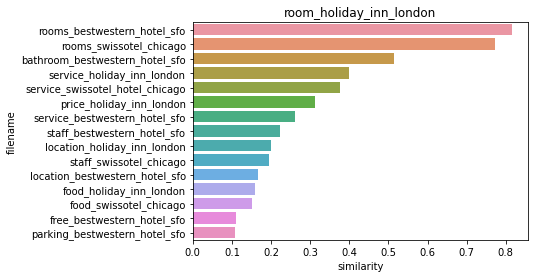

In [26]:
# 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화하기

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)